<a href="https://colab.research.google.com/github/Veerendravikas04/Finger_Printcode/blob/main/Fingerprint_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

import pandas as pd
import matplotlib.image as mpimg

In [ ]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d rajumavinmar/finger-print-based-blood-group-dataset

Dataset URL: https://www.kaggle.com/datasets/rajumavinmar/finger-print-based-blood-group-dataset
License(s): unknown
finger-print-based-blood-group-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

dataset_blood_group  finger-print-based-blood-group-dataset.zip  sample_data


In [ ]:

from zipfile import ZipFile

dataset = '/content/finger-print-based-blood-group-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

dataset_blood_group  finger-print-based-blood-group-dataset.zip  sample_data


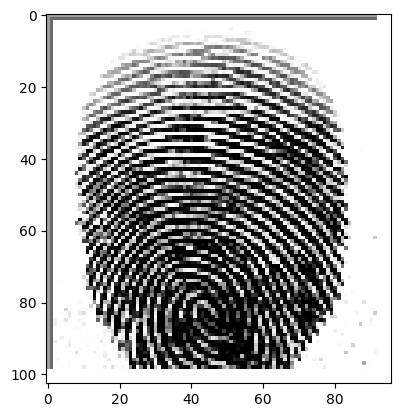

In [ ]:
import matplotlib.pyplot as plt
img=mpimg.imread("/content/dataset_blood_group/A-/cluster_1_1.BMP")
plt.imshow(img)

In [ ]:
type(img)

numpy.ndarray

In [ ]:
img.shape

(103, 96, 4)

In [ ]:
import os
file_names = os.listdir('/content/dataset_blood_group')

for i in range(5):

  name = file_names[i]
  print(name)

B+
AB-
AB+
A+
O-


In [ ]:
Blood_groups=['A+','A-','AB+','AB-','B+','B-','O+','O-']
for group in Blood_groups:
  blood='/content/dataset_blood_group/'+group
  path, dirs, files = next(os.walk(blood))
  file_count = len(files)
  print(f"number of image {group} blood group is:{file_count}")

number of image A+ blood group is:565
number of image A- blood group is:1009
number of image AB+ blood group is:708
number of image AB- blood group is:761
number of image B+ blood group is:652
number of image B- blood group is:741
number of image O+ blood group is:852
number of image O- blood group is:712


In [ ]:
os.mkdir('/content/image_resized')

In [ ]:
from PIL import Image
import os

folder_path = "/content/image_resized"
os.makedirs(folder_path, exist_ok=True)
Blood_groups = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

for group in Blood_groups:
    blood_folder = '/content/dataset_blood_group/' + group + '/'
    file_names = os.listdir(blood_folder)
    c = 1
    max_images = min(len(file_names), 600)

    for file_name in file_names:
        if c > max_images:
            break

        current_path = os.path.join(blood_folder, file_name)
        new_name = group + '_' + str(c) + os.path.splitext(file_name)[1]
        new_path = os.path.join(blood_folder, new_name)

        os.rename(current_path, new_path)

        img = Image.open(new_path).convert("RGB")  # Convert image to RGB
        img_resized = img.resize((200, 200))  # Resize to 200x200
        img_resized.save(os.path.join(folder_path, new_name))

        c += 1

In [ ]:
import os
from collections import Counter

folder_path = "/content/image_resized"
file_names = os.listdir(folder_path)

def extract_blood_group(file_name):
    if '_' in file_name:
        return file_name.split('_')[0]
    return ''

blood_groups = [extract_blood_group(name) for name in file_names]
blood_group_counts = Counter(blood_groups)

for group, count in blood_group_counts.items():
    print(f"Blood group {group}: {count} files")


Blood group AB+: 600 files
Blood group A-: 600 files
Blood group O-: 600 files
Blood group AB-: 600 files
Blood group B-: 600 files
Blood group O+: 600 files
Blood group A+: 565 files
Blood group B+: 600 files


In [ ]:
path="/content/image_resized/A+_1.BMP"
img=mpimg.imread(path)
print(type(img))

<class 'numpy.ndarray'>


In [ ]:
print(img.shape)

(200, 200, 3)


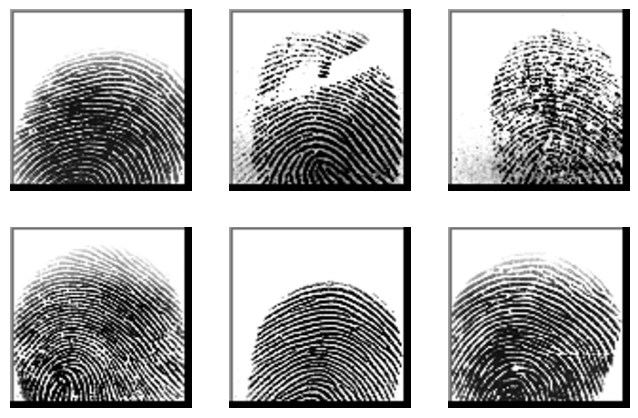

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

folder_path = "/content/image_resized"
file_names = os.listdir(folder_path)
plt.figure(figsize=(8,8))
for i in range(6):
    axes = plt.subplot(3, 3, i+1)
    img = mpimg.imread(folder_path + '/' + file_names[i])
    plt.imshow(img)
    plt.axis('off')
plt.show()


In [ ]:
import os

labels = []
images = []
folder_path = "/content/image_resized"
file_names = os.listdir(folder_path)
Blood_groups = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

for file_name in file_names:
    if file_name.startswith('AB'):
        name = file_name[:3]  # For 'AB+' or 'AB-'
    else:
        name = file_name[:2]  # For others

    if name in Blood_groups:
        index = Blood_groups.index(name)
        labels.append(index)
        images.append(folder_path + '/' + file_name)


In [ ]:
print(f"Number of images: {len(images)}")
print(f"Number of labels: {len(labels)}")

Number of images: 4765
Number of labels: 4765


In [ ]:

import numpy as np
from PIL import Image

image_arrays = []
for img_path in images:
    img = Image.open(img_path)
    img_array = np.array(img)
    image_arrays.append(img_array)

image_arrays = np.array(image_arrays)
print(image_arrays.shape)

(4765, 200, 200, 3)


In [ ]:
labels=np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
image_arrays, labels = shuffle(image_arrays, labels, random_state=90)

x_train, x_test, y_train, y_test = train_test_split(image_arrays, labels, test_size=0.2, random_state=42)

print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (3812, 200, 200, 3)
x_test shape: (953, 200, 200, 3)
y_train shape: (3812,)
y_test shape: (953,)


In [ ]:
# Display a few samples to verify that shuffling worked
print("Sample training labels after shuffling and splitting:")
print(y_train[:10])

# Optionally, check the corresponding image shapes
print("Sample image shapes from training set:")
print([img.shape for img in x_train[:10]])


Sample training labels after shuffling and splitting:
[6 4 2 2 7 0 5 6 3 5]
Sample image shapes from training set:
[(200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3), (200, 200, 3)]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 4
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Flatten and Dense Layers
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.6))  # Dropout to reduce overfitting

# Output Layer
model.add(Dense(len(Blood_groups), activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 99, 99, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 97, 97, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 21, 21, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 10, 10, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      13,107,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           4,104 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,500,232 (51.50 MB)

 Trainable params: 13,500,232 (51.50 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=32,
    epochs=20,
    verbose=1
)

Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 23s 111ms/step - accuracy: 0.2643 - loss: 1.9228 - val_accuracy: 0.7733 - val_loss: 0.6197
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.7426 - loss: 0.6984 - val_accuracy: 0.6789 - val_loss: 0.7707
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.8014 - loss: 0.5494 - val_accuracy: 0.7964 - val_loss: 0.5193
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - accuracy: 0.8344 - loss: 0.4528 - val_accuracy: 0.8416 - val_loss: 0.4236
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.8322 - loss: 0.4705 - val_accuracy: 0.8321 - val_loss: 0.4667
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.8330 - loss: 0.4569 - val_accuracy: 0.8898 - val_loss: 0.3068
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - accuracy: 0.8895 - loss: 0.2856 - val_accuracy: 0.8814 - val_loss: 0.2944
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - accuracy: 0.8866 - loss: 0.3145 - va

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9056 - loss: 0.2674
Test loss: 0.23464712500572205
Test accuracy: 0.9129065871238708


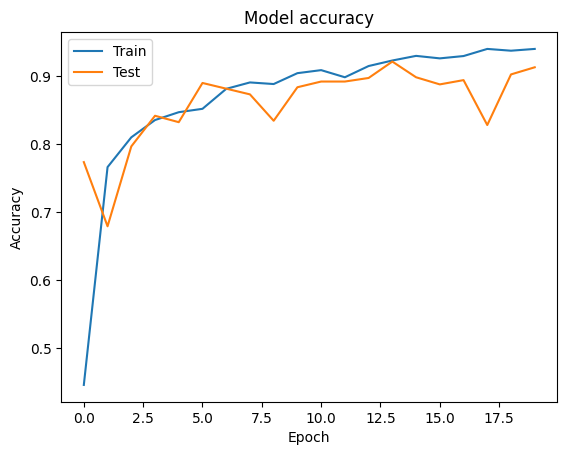

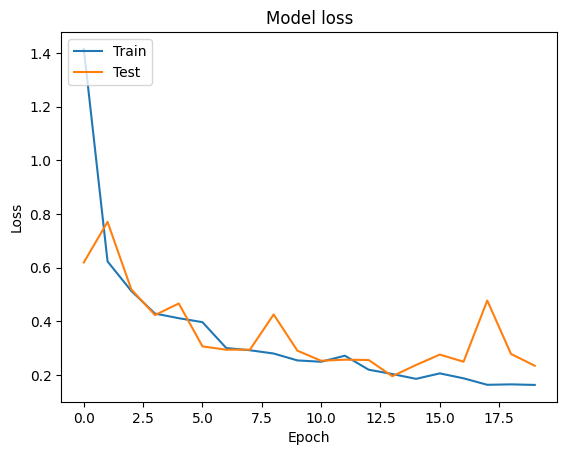

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
import joblib
joblib.dump(model, 'model.pkl')

['model.pkl']

In [ ]:
Blood_groups = ['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

input_path = input("Enter the path of the image: ")

img = Image.open(input_path).convert("RGB")
img_resized = img.resize((200, 200))
img_array = np.array(img_resized)
img_array = img_array / 255.0
img_array = img_array.reshape(1, 200, 200, 3)

prediction = model.predict(img_array)
predicted_index = prediction.argmax()

predicted_blood_group = Blood_groups[predicted_index]

print(f"Predicted Blood Group: {predicted_blood_group}")


Enter the path of the image: /content/image_resized/A+_100.BMP
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 749ms/step
Predicted Blood Group: A+
